# Imports

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

# 1.1 Data preparation

In [5]:
data = pandas.read_csv("glass_dataset.csv")
# Inputs is features, Data is the whole dataset, Targets is the labels
targets = data["Type"] # Label of the type of glass (1-7)
inputs = data.drop("Type", axis=1) # Features of the glass

In [6]:
print(data.head())  
print(data.columns)  
print(inputs.isnull().sum())  # Ensure no missing values
print("targets", targets)
print("inputs", inputs)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64
targets 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64
inputs           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  

In [25]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)
compressed = PCA(n_components=4).fit_transform(scaled_inputs) # given it has 9 features

# 1.2 Classifcation 

## KNN

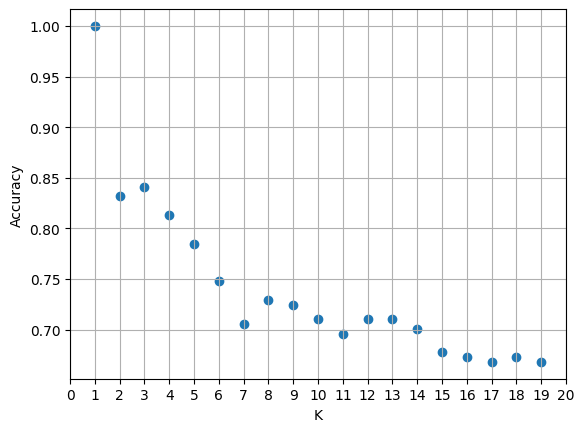

In [9]:
k_range = range (1,20)
scores = []
for k in k_range :
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit (scaled_inputs,targets)
    scores.append (knn.score(scaled_inputs,targets))
plt.figure()
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.scatter(k_range,scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.grid(True)
plt.savefig ("knn_neighbours.png", bbox_inches ="tight")
plt.show()

In [10]:
k_classifier = KNeighborsClassifier(n_neighbors=1).fit(scaled_inputs,targets)
classified_data = k_classifier.predict(scaled_inputs)

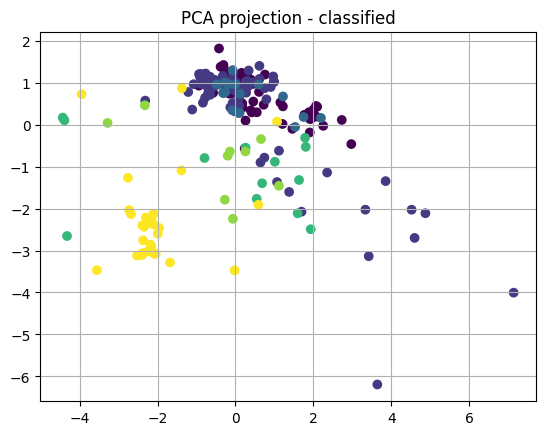

In [11]:
plt.figure()
plt.scatter(compressed [:,0], compressed [:,1], c=classified_data, cmap='viridis')
plt.title("PCA projection - classified")
plt.grid(True)
plt.savefig("glass_pca_classified.png", bbox_inches ="tight")
plt.show()


## SVM 

In [88]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) # given it has 9 features, higher dimensions might be useful
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)

### Kernel

In [13]:
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

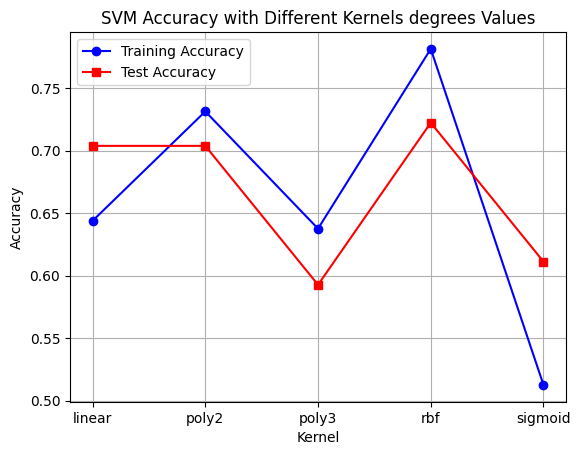

In [ ]:
plt.figure()
plt.title("SVM Accuracy with Different Kernels degrees Values")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_4.png", bbox_inches="tight")
plt.show()

### Cross Validation Heatmap for C and Gamma values

In [151]:
gamma_range = np.linspace(0.1, 4.0, 40)
c_range = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 10, 100, 1000]

train_scores = np.zeros((len(gamma_range), len(c_range)))
test_scores = np.zeros((len(gamma_range), len(c_range)))

for x, g in enumerate(gamma_range):
    for y, c in enumerate(c_range):
        svm_classifier = SVC(kernel="rbf", gamma=g, C=c).fit(x_train, t_train)
        y_train = svm_classifier.predict(x_train)
        y_test = svm_classifier.predict(x_test)
        
        train_scores[x, y] = accuracy_score(t_train, y_train)
        test_scores[x, y] = accuracy_score(t_test, y_test)

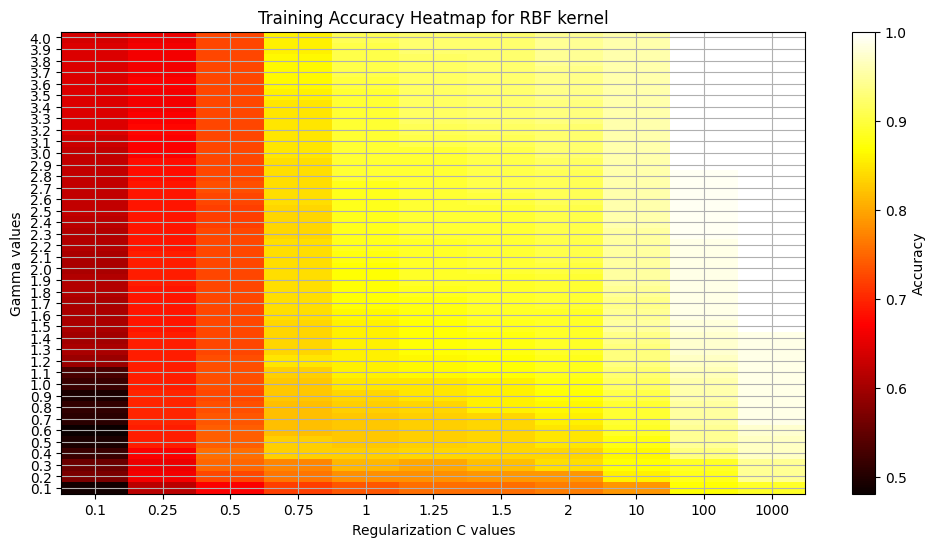

In [152]:
# Training accuracy heatmap for RBF kernel
plt.figure(figsize=(12, 6))
plt.title("Training Accuracy Heatmap for RBF kernel")
plt.subplot(1, 1, 1)
plt.imshow(train_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
plt.savefig("RFD_training_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

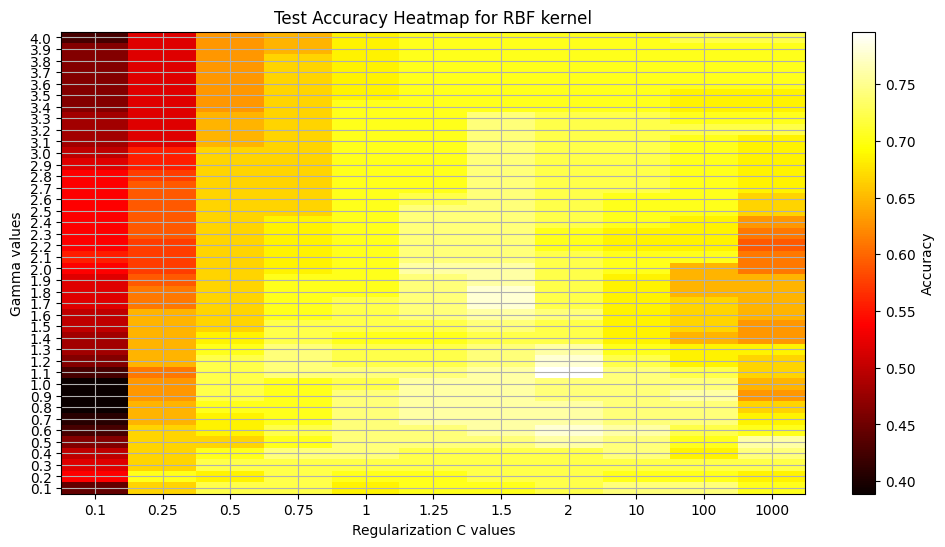

In [153]:
# Test accuracy heatmap for RFD kernel
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for RBF kernel")
plt.imshow(test_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range,2))
plt.grid(True)
plt.savefig("RFD_test_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

In [ ]:
# Training accuracy heatmap for Polynomial kernel
plt.figure(figsize=(12, 6))
plt.title("Training Accuracy Heatmap for Polynomial kernel")
plt.subplot(1, 1, 1)
plt.imshow(train_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
plt.savefig("RFD_training_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

In [ ]:
# Test accuracy heatmap
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for Polynomial kernel")
plt.imshow(test_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range,2))
plt.grid(True)
plt.savefig("RFD_test_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

In [148]:
parameters = { 
    'C': [0.1,1,1.1,2,3,10, 100,500,150,1000],
    'gamma': ['scale', 'auto', 0.01,0.1,0.15,0.25,0.5,0.75,1,1.1,1.2,1.25,1.5,1.75,2,10]
}

svm_classifier = SVC(kernel="rbf")

grid_search = GridSearchCV(svm_classifier, parameters, cv=5, scoring='accuracy')

grid_search.fit(x_train, t_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

y_test = best_model.predict(x_test)
y_test = best_model.predict(x_test)

train_accuracy= accuracy_score(t_train, y_train)
test_accuracy = accuracy_score(t_test, y_test)

print(f"RBF Parameters GridSearch Accuracy: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")

Best Parameters: {'C': 100, 'gamma': 0.1}
RBF Parameters GridSearch Accuracy: 0.86875 training accuracy, 0.7407407407407407 testing accuracy


In [147]:
svm_classifier_grid = SVC(kernel="rbf",gamma=0.1,C=100).fit(x_train, t_train) 
# RBF : 0.86875 training accuracy, 0.7407407407407407 testing accuracy

y_train = svm_classifier_grid.predict(x_train)
y_test = svm_classifier_grid.predict(x_test)

train_accuracy = accuracy_score(t_train, y_train)
test_accuracy= accuracy_score(t_test, y_test)
print(f"RBF Parameters GridSearch Accuracy: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")


RBF Parameters GridSearch Accuracy: 0.86875 training accuracy, 0.7407407407407407 testing accuracy


In [146]:
svm_classifier_heatmap = SVC(kernel="rbf",gamma=1.1,C=2).fit(x_train, t_train) 
# RBF : 0.88125 training accuracy, 0.7962962962962963 testing accuracy #from heatmap

y_train = svm_classifier_heatmap.predict(x_train)
y_test = svm_classifier_heatmap.predict(x_test)
train_accuracy = accuracy_score(t_train, y_train)
test_accuracy= accuracy_score(t_test, y_test)
print(f"RBF Parameters Accuracy: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")

RBF Parameters Accuracy: 0.88125 training accuracy, 0.7962962962962963 testing accuracy


### Gridsearch

In [ ]:
parameters = [
    {
        'kernel': ['poly'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale'],
        'degree': [2, 3],
        'coef0': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
    },
    {
        'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale']
    },
    {
        'kernel': ['linear'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100]
    }
]

grid = GridSearchCV(
    SVC(), # model
    parameters, #parameters to tune
    scoring='accuracy', #evaluation metric
    cv=4, #number of cross validation
    verbose=1, #  to print the progress
    n_jobs=-1  # how many cores to use in parallel
)

grid.fit(compressed, targets)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
# {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'} #found by grid search
# {'C': 0.5, 'coef0': 0.25, 'degree': 3, 'gamma': 2, 'kernel': 'poly'} #found by grid search
# svm_classifier_poly = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9).fit(x_train, t_train) #more generalised found by me
# Best parameters: {'C': 10, 'coef0': 2, 'degree': 2, 'gamma': 0.75, 'kernel': 'poly'}
# Best parameters: {'C': 1, 'coef0': 1, 'degree': 3, 'gamma': 0.75, 'kernel': 'poly'}


Fitting 4 folds for each of 2907 candidates, totalling 11628 fits
Best parameters: {'C': 100, 'coef0': 0.75, 'degree': 3, 'gamma': 0.25, 'kernel': 'poly'}
Best cross-validation score: 0.6964


In [ ]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)

### Conclusion of SVM

In [ ]:
svm_classifier_manual = SVC(kernel="rbf",gamma=1.1,C=70).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)
#RBF kernel Manual: 0.7875 training accuracy, 0.6666666666666666 testing accuracy

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"RBF kernel Manual: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")

#svm_classifier_poly_grid = SVC(kernel="poly",degree=3,gamma=0.75,C=2,coef0=1).fit(x_train, t_train)
#Polynomial kernel Grid: 0.875 training accuracy, 0.7037037037037037 testing accuracy

#svm_classifier_poly_grid = SVC(kernel="poly",degree=2,gamma=0.75,C=10,coef0=2).fit(x_train, t_train)
#Polynomial kernel Grid: 0.86875 training accuracy, 0.6851851851851852 testing accuracy

#svm_classifier_poly_grid = SVC(kernel="poly",degree=3,gamma=0.25,C=100,coef0=0.75).fit(x_train, t_train)
#Polynomial kernel Grid: 0.88125 training accuracy, 0.6851851851851852 testing accuracy

# y_train_poly_grid = svm_classifier_poly_grid.predict(x_train)
# y_test_poly_grid = svm_classifier_poly_grid.predict(x_test)

# train_accuracy_poly_grid = accuracy_score(t_train, y_train_poly_grid)
# test_accuracy_poly_grid = accuracy_score(t_test, y_test_poly_grid)
# print(f"Polynomial kernel Grid: {train_accuracy_poly_grid} training accuracy, {test_accuracy_poly_grid} testing accuracy")



RBF kernel Manual: 0.95625 training accuracy, 0.7407407407407407 testing accuracy
Polynomial kernel Grid: 0.88125 training accuracy, 0.6851851851851852 testing accuracy


## Imports 

## 1.3 Assessment of classification